# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=imperial&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san rafael
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | lensk
Processing Record 5 of Set 1 | sobolevo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | saint-joseph
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | garmsar
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | port lincoln
Processing Record 18 of Set 1 | burnie
Processing Record 19 of Set 1 | olinda
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | awbari
Processing Record 23 of Set 1 | upernav

Processing Record 39 of Set 4 | corinto
Processing Record 40 of Set 4 | daloa
Processing Record 41 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 42 of Set 4 | lander
Processing Record 43 of Set 4 | puerto ayora
Processing Record 44 of Set 4 | piacabucu
Processing Record 45 of Set 4 | sao filipe
Processing Record 46 of Set 4 | sao gabriel da cachoeira
Processing Record 47 of Set 4 | mabaruma
Processing Record 48 of Set 4 | hamilton
Processing Record 49 of Set 4 | asyut
Processing Record 0 of Set 5 | muros
Processing Record 1 of Set 5 | lebu
Processing Record 2 of Set 5 | portland
Processing Record 3 of Set 5 | turbat
Processing Record 4 of Set 5 | saskylakh
Processing Record 5 of Set 5 | marawi
Processing Record 6 of Set 5 | hofn
Processing Record 7 of Set 5 | cherskiy
Processing Record 8 of Set 5 | usta muhammad
Processing Record 9 of Set 5 | cape town
Processing Record 10 of Set 5 | bulungu
Processing Record 11 of Set 5 | mitzic
Processing Record 12 o

Processing Record 24 of Set 8 | banda aceh
Processing Record 25 of Set 8 | fare
Processing Record 26 of Set 8 | cam ranh
Processing Record 27 of Set 8 | te anau
Processing Record 28 of Set 8 | chapais
Processing Record 29 of Set 8 | sidmouth
Processing Record 30 of Set 8 | svetlaya
Processing Record 31 of Set 8 | aranos
Processing Record 32 of Set 8 | palotina
Processing Record 33 of Set 8 | fenoarivo
Processing Record 34 of Set 8 | fallon
Processing Record 35 of Set 8 | kuopio
Processing Record 36 of Set 8 | malakal
Processing Record 37 of Set 8 | rio linda
Processing Record 38 of Set 8 | griffith
Processing Record 39 of Set 8 | talara
Processing Record 40 of Set 8 | zhitikara
City not found. Skipping...
Processing Record 41 of Set 8 | ust-kut
Processing Record 42 of Set 8 | bambanglipuro
Processing Record 43 of Set 8 | ongandjera
Processing Record 44 of Set 8 | kabala
Processing Record 45 of Set 8 | cayenne
Processing Record 46 of Set 8 | huaral
Processing Record 47 of Set 8 | cabede

Processing Record 12 of Set 12 | jining
Processing Record 13 of Set 12 | melbu
Processing Record 14 of Set 12 | bilibino
Processing Record 15 of Set 12 | asilah
Processing Record 16 of Set 12 | casambalangan
Processing Record 17 of Set 12 | dustlik
Processing Record 18 of Set 12 | soverato
Processing Record 19 of Set 12 | viedma
Processing Record 20 of Set 12 | nuuk
Processing Record 21 of Set 12 | chimoio
Processing Record 22 of Set 12 | yoichi
Processing Record 23 of Set 12 | yatou
Processing Record 24 of Set 12 | quime
Processing Record 25 of Set 12 | soddy-daisy
Processing Record 26 of Set 12 | havoysund
Processing Record 27 of Set 12 | betanzos
Processing Record 28 of Set 12 | porto velho
Processing Record 29 of Set 12 | saint-georges
Processing Record 30 of Set 12 | mattru
Processing Record 31 of Set 12 | vila franca do campo
Processing Record 32 of Set 12 | san fernando
Processing Record 33 of Set 12 | ampanihy
Processing Record 34 of Set 12 | petit goave
Processing Record 35 of

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san rafael,-34.6177,-68.3301,88.25,16,0,13.06,AR,1675548953
1,arraial do cabo,-22.9661,-42.0278,78.24,86,29,12.06,BR,1675549026
2,nikolskoye,59.7035,30.7861,24.78,93,99,6.96,RU,1675549026
3,lensk,60.7253,114.9278,-9.54,100,100,1.81,RU,1675549027
4,sobolevo,54.4299,31.8996,22.95,93,100,12.57,RU,1675549028


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv('output_data/cities.csv', index_label='City_ID')

In [2]:
# Read saved data
city_data_df = pd.read_csv('output_data/cities.csv', index_col='City_ID')

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san rafael,-34.6177,-68.3301,88.25,16,0,13.06,AR,1675548953
1,arraial do cabo,-22.9661,-42.0278,78.24,86,29,12.06,BR,1675549026
2,nikolskoye,59.7035,30.7861,24.78,93,99,6.96,RU,1675549026
3,lensk,60.7253,114.9278,-9.54,100,100,1.81,RU,1675549027
4,sobolevo,54.4299,31.8996,22.95,93,100,12.57,RU,1675549028


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

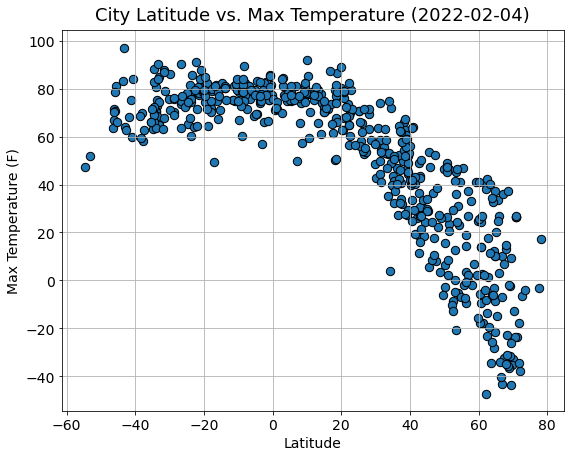

In [3]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.figure(figsize=[9, 7])
plt.scatter(x_axis, y_axis, edgecolors='black', s=70)

# Incorporate the other graph properties
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=14)
plt.title("City Latitude vs. Max Temperature (2022-02-04)", fontsize=18, pad=10)

# Save the figure
plt.savefig('output_data/Fig1.png')

# Show plot
plt.show()

#### Latitude Vs. Humidity

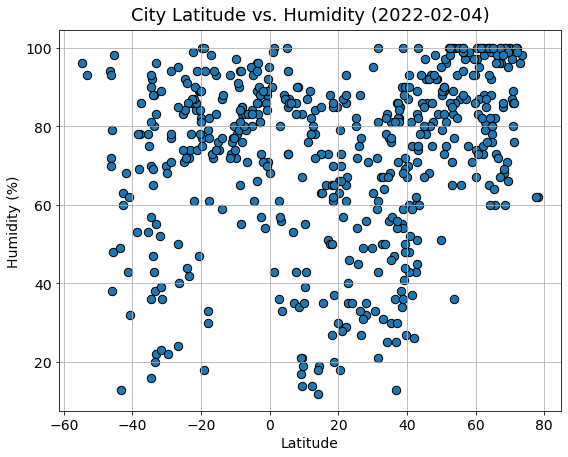

In [4]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.figure(figsize=[9, 7])
plt.scatter(x_axis, y_axis, edgecolors='black', s=70)

# Incorporate the other graph properties
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.title("City Latitude vs. Humidity (2022-02-04)", fontsize=18, pad=10)

# Save the figure
plt.savefig('output_data/Fig2.png')

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

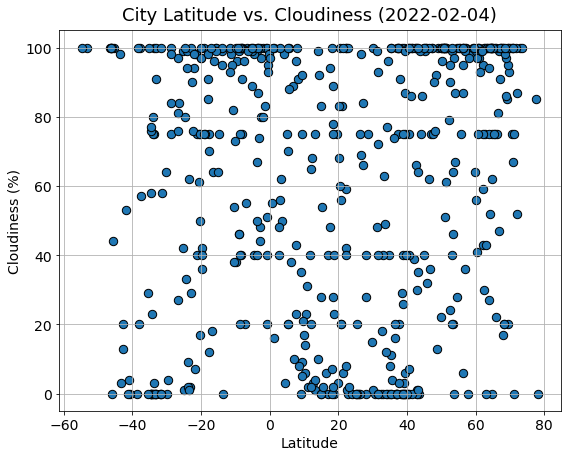

In [5]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.figure(figsize=[9, 7])
plt.scatter(x_axis, y_axis, edgecolors='black', s=70)

# Incorporate the other graph properties
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.title("City Latitude vs. Cloudiness (2022-02-04)", fontsize=18, pad=10)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

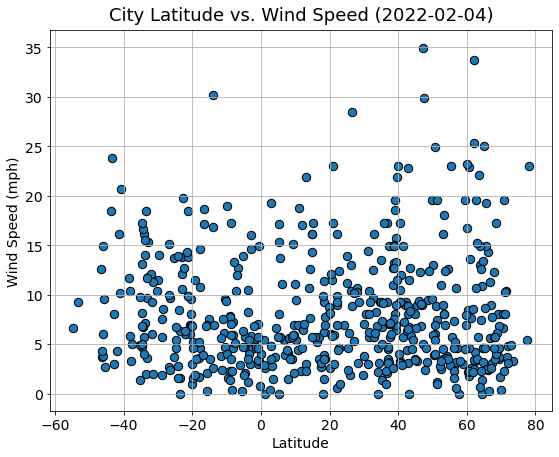

In [6]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.figure(figsize=[9, 7])
plt.scatter(x_axis, y_axis, edgecolors='black', s=70)

# Incorporate the other graph properties
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=14)
plt.title("City Latitude vs. Wind Speed (2022-02-04)", fontsize=18, pad=10)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
def linear_regress(x_values, y_values, x_label, y_label, xy_string):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.figure(figsize=[9, 7])
    plt.scatter(x_values, y_values, s=70)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, xy_string, fontsize=20, color="red")
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,nikolskoye,59.7035,30.7861,24.78,93,99,6.96,RU,1675549026
3,lensk,60.7253,114.9278,-9.54,100,100,1.81,RU,1675549027
4,sobolevo,54.4299,31.8996,22.95,93,100,12.57,RU,1675549028
7,yellowknife,62.4560,-114.3525,-13.56,88,30,3.29,CA,1675548781
10,hilo,19.7297,-155.0900,80.28,85,75,8.05,US,1675548848


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san rafael,-34.6177,-68.3301,88.25,16,0,13.06,AR,1675548953
1,arraial do cabo,-22.9661,-42.0278,78.24,86,29,12.06,BR,1675549026
5,rikitea,-23.1203,-134.9692,78.94,74,2,13.80,PF,1675548787
6,hobart,-42.8794,147.3294,64.06,63,20,8.05,AU,1675549029
8,mar del plata,-38.0023,-57.5575,69.84,69,20,10.36,AR,1675549031


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8558414958003822


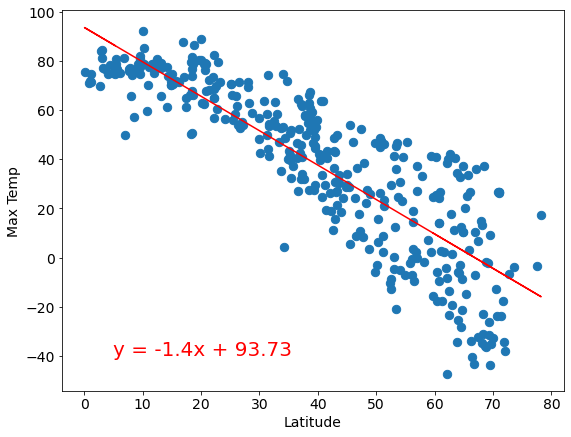

In [54]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

linear_regress(x_values, y_values, "Latitude", "Max Temp", (5, -40))

The r-value is: 0.3215437528822716


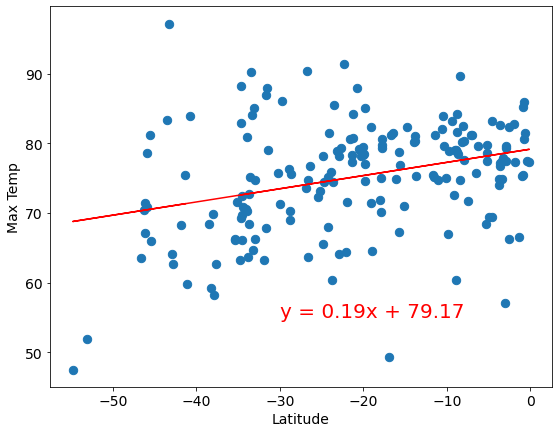

In [50]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

linear_regress(x_values, y_values, "Latitude", "Max Temp", (-30, 55))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.45297150058635066


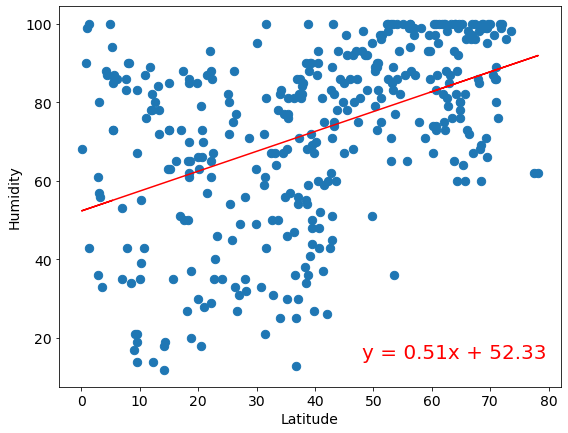

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

linear_regress(x_values, y_values, "Latitude", "Humidity", (48, 15))

The r-value is: 0.32309588587652327


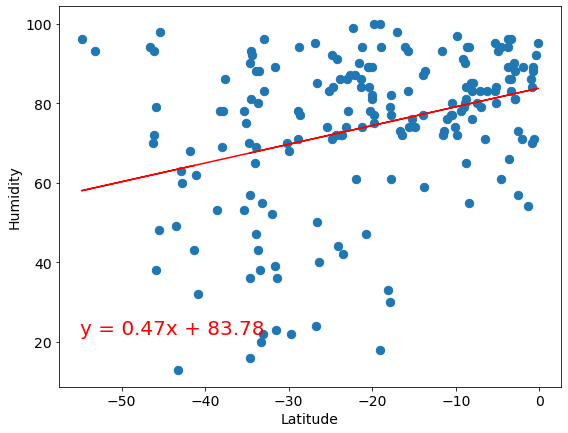

In [59]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

linear_regress(x_values, y_values, "Latitude", "Humidity", (-55, 22))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.34173006388357424


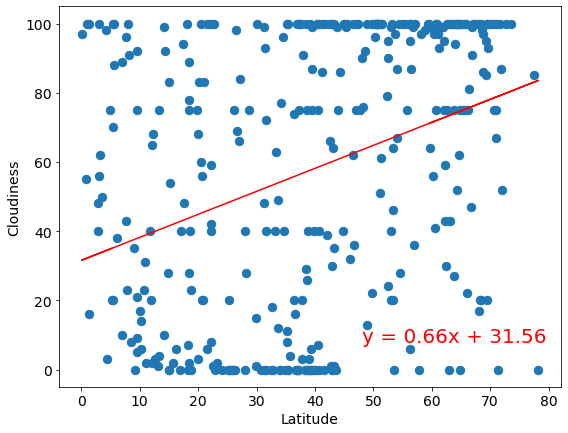

In [62]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

linear_regress(x_values, y_values, "Latitude", "Cloudiness", (48, 8))

The r-value is: 0.2968405459074096


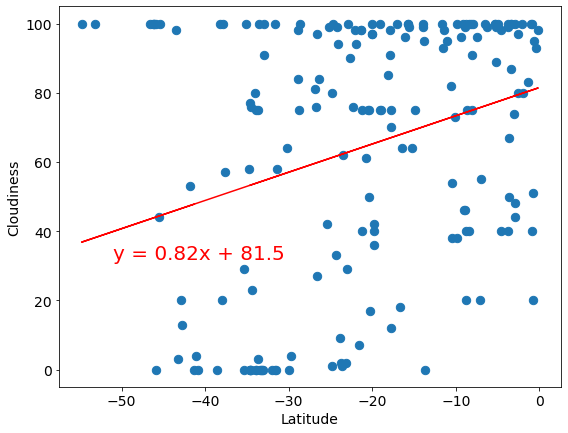

In [65]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

linear_regress(x_values, y_values, "Latitude", "Cloudiness", (-51, 32))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0512376072836225


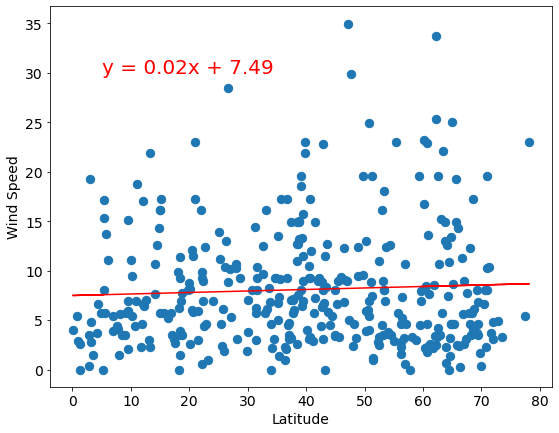

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

linear_regress(x_values, y_values, "Latitude", "Wind Speed", (5, 30))

The r-value is: -0.21054215686586375


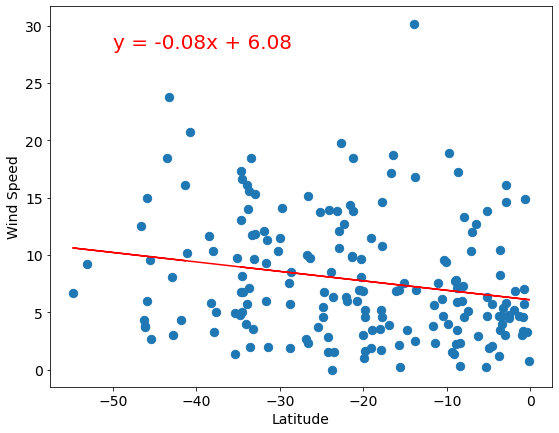

In [71]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

linear_regress(x_values, y_values, "Latitude", "Wind Speed", (-50, 28))

**Discussion about the linear relationship:** YOUR RESPONSE HERE